In [1]:
from ucimlrepo import fetch_ucirepo # fetch dataset
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
data = air_quality.data.features 
  
# # metadata 
# print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables)

             name     role         type demographic  \
0            Date  Feature         Date        None   
1            Time  Feature  Categorical        None   
2          CO(GT)  Feature      Integer        None   
3     PT08.S1(CO)  Feature  Categorical        None   
4        NMHC(GT)  Feature      Integer        None   
5        C6H6(GT)  Feature   Continuous        None   
6   PT08.S2(NMHC)  Feature  Categorical        None   
7         NOx(GT)  Feature      Integer        None   
8    PT08.S3(NOx)  Feature  Categorical        None   
9         NO2(GT)  Feature      Integer        None   
10   PT08.S4(NO2)  Feature  Categorical        None   
11    PT08.S5(O3)  Feature  Categorical        None   
12              T  Feature   Continuous        None   
13             RH  Feature   Continuous        None   
14             AH  Feature   Continuous        None   

                                          description       units  \
0                                                N

In [3]:
df = pd.DataFrame(data)


In [4]:
df = pd.DataFrame(data)
dateTime = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.insert(0, 'DateTime', dateTime)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.drop(columns=['Date', 'Time'], inplace=True)
df.sort_values('DateTime', inplace=True)
df.head(5)

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
# skip rows for now with missing values, will improve later
df = df[~df['T'].isin([-200])]
df = df[~df['CO(GT)'].isin([-200])]
df = df[~df['NO2(GT)'].isin([-200])]
df = df[~df['RH'].isin([-200])]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       6941 non-null   datetime64[ns]
 1   CO(GT)         6941 non-null   float64       
 2   PT08.S1(CO)    6941 non-null   int64         
 3   NMHC(GT)       6941 non-null   int64         
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   int64         
 6   NOx(GT)        6941 non-null   int64         
 7   PT08.S3(NOx)   6941 non-null   int64         
 8   NO2(GT)        6941 non-null   int64         
 9   PT08.S4(NO2)   6941 non-null   int64         
 10  PT08.S5(O3)    6941 non-null   int64         
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 813.4 KB


In [6]:
temps = df.groupby(df['DateTime'].dt.floor('D'))['T'].mean()
humidity = df.groupby(df['DateTime'].dt.floor('D'))['RH'].mean()
CO = df.groupby(df['DateTime'].dt.floor('2D'))['CO(GT)'].mean()
NO2 = df.groupby(df['DateTime'].dt.floor('2D'))['NO2(GT)'].mean()

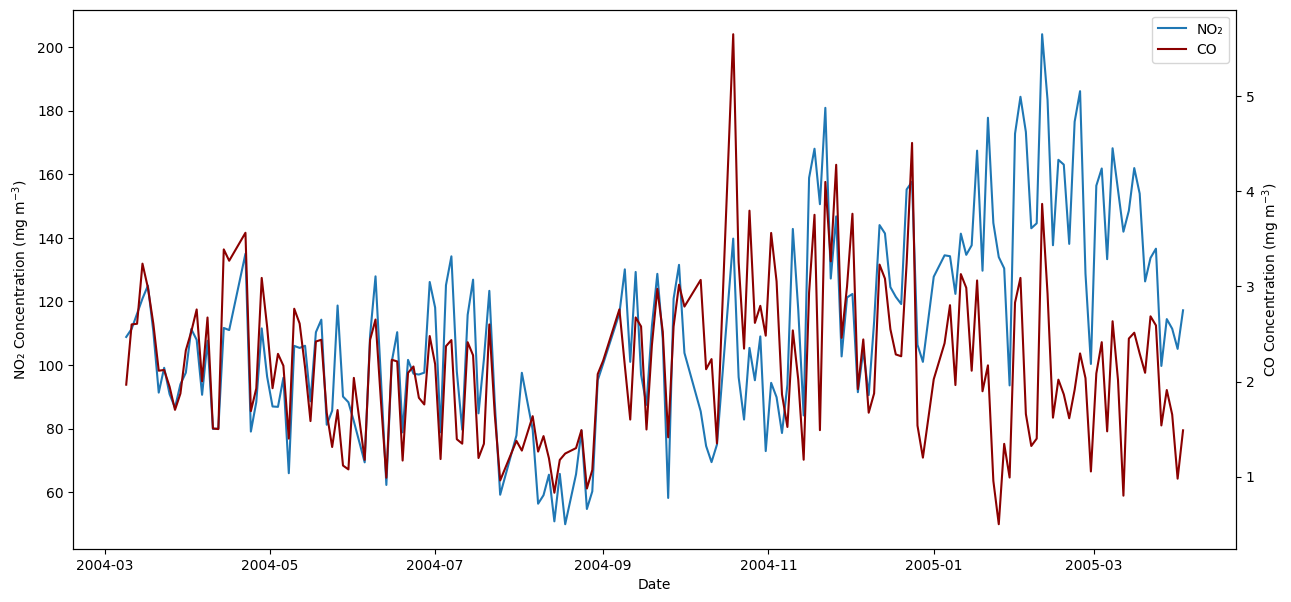

In [7]:
fig1, ax1 = plt.subplots(figsize=(15,7))
ax2 = ax1.twinx()

g1 = ax1.plot(NO2, label='NO\N{subscript two}')
g2 = ax2.plot(CO, color='darkred', label='CO')
ax1.legend(handles=g1+g2)

ax1.set_xlabel('Date')
ax1.set_ylabel('NO\N{subscript two} Concentration (mg m$^{-3}$)')
ax2.set_ylabel('CO Concentration (mg m$^{-3}$)')
plt.show()


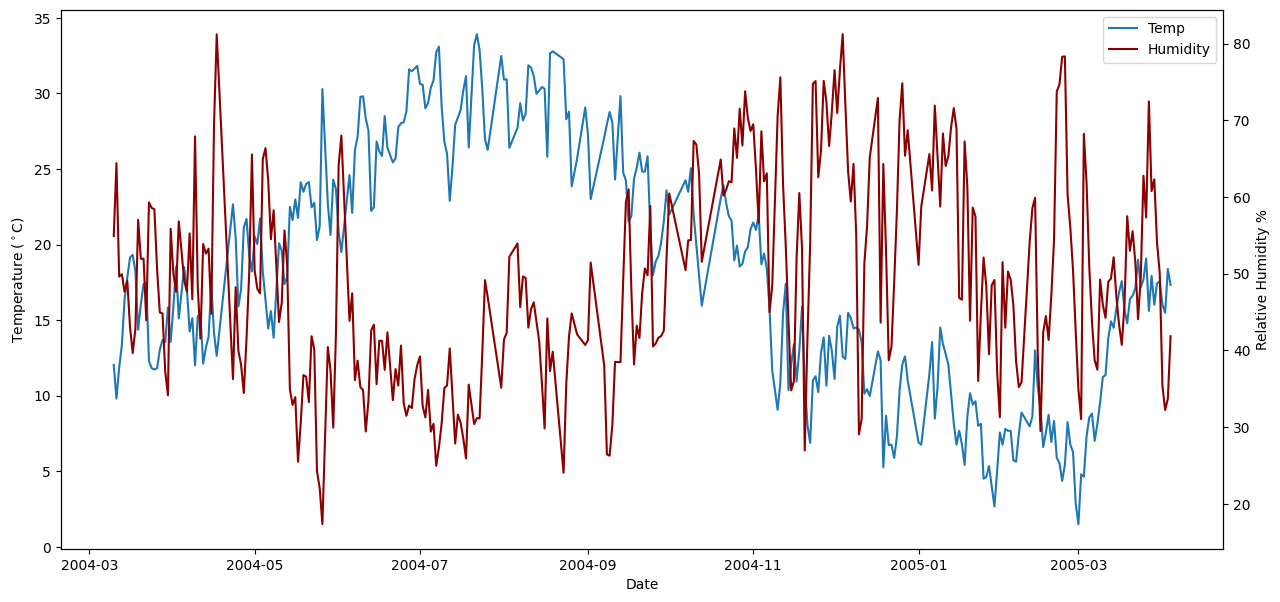

In [8]:
fig2, ax1 = plt.subplots(figsize=(15,7))
ax2 = ax1.twinx()

g1 = ax1.plot(temps, label='Temp')
g2 = ax2.plot(humidity, color='darkred', label='Humidity')
ax1.legend(handles=g1+g2)

ax1.set_xlabel('Date')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax2.set_ylabel('Relative Humidity %')
plt.show()
